| Cata Sample tem 15-20 mili segundos |

| Criação da leitura e mapeamento dos dados de 1 json | 

In [144]:
import pandas as pd
import json
import glob
import os
from pandas.io.json import json_normalize

f = open('sensors/00qhiaz_1542975441749.json')
data = json.load(f)
with open('sensors/00qhiaz_1542975441749.json', 'r') as json_data:
   gay = json.load(json_data)


In [ ]:
json_string = json.dumps(data)

| Printar Json na tela |

In [ ]:
data

| Usar normalize para verificar parametros/tipos de label do json |

Dataset divido em :

player_id	: id

accelerometer	: z,x,y, screen

gyroscope	: z,x,y, screen

deviceMotion	: z,x,y, screen

magnetometer : z,x,y, screen

In [2]:
x = json_normalize(data)
x

C:\Users\rafav\AppData\Local\Temp\ipykernel_10404\3815656361.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  x = json_normalize(data)


,player_id,accelerometer,gyroscope,deviceMotion,magnetometer
0,0c87n4d,"[{'z': -0.051025390625, 'y': 0.99267578125, 'x...","[{'z': -0.01038470957428217, 'y': -0.024434609...",[{'accelerationIncludingGravity': {'z': 0.2782...,"[{'z': 6.899999618530273, 'y': -35.39999771118..."


| Verificar quais dados são passados mudando por tipo do parametro solicitado, não são os mesmos. |

criação de 1 data frame unico para visualização por camadas/ quantidade de dados

No exemplo são tirados 197 dados em cada parametroata

In [244]:
df = pd.DataFrame(data['accelerometer'])
df

,x,y,z,screen
0,-0.383621,-0.756699,-0.527191,RegisterScreen
1,-0.368729,-0.785202,-0.526932,RegisterScreen
2,-0.363907,-0.788544,-0.501358,RegisterScreen
3,-0.377747,-0.775574,-0.572128,RegisterScreen
4,-0.380341,-0.762253,-0.532028,RegisterScreen
...,...,...,...,...
194,-0.372681,-0.743118,-0.549850,MathisisGame - 1.1.1
195,-0.380692,-0.741348,-0.552994,MathisisGame - 1.1.1
196,-0.381973,-0.735413,-0.549011,MathisisGame - 1.1.1
197,-0.377686,-0.738037,-0.557022,MathisisGame - 1.1.1


In [190]:
for i in data['accelerometer']:
    print(i)

{'z': 0.5986328125, 'y': 0.822265625, 'x': 0.037109375, 'screen': 'RegisterScreen'}
{'z': 0.576171875, 'y': 0.8251953125, 'x': 0.0390625, 'screen': 'RegisterScreen'}
{'z': 0.5849609375, 'y': 0.826171875, 'x': 0.0244140625, 'screen': 'RegisterScreen'}
{'z': 0.5927734375, 'y': 0.8212890625, 'x': 0.03027343936264515, 'screen': 'RegisterScreen'}
{'z': 0.5712890625, 'y': 0.81640625, 'x': 0.02929687313735485, 'screen': 'RegisterScreen'}
{'z': 0.609375, 'y': 0.8125, 'x': 0.046875, 'screen': 'RegisterScreen'}
{'z': 0.560546875, 'y': 0.8173828125, 'x': 0.0361328125, 'screen': 'RegisterScreen'}
{'z': 0.580078125, 'y': 0.8125, 'x': 0.0419921875, 'screen': 'RegisterScreen'}
{'z': 0.5751953125, 'y': 0.8125, 'x': 0.0390625, 'screen': 'RegisterScreen'}
{'z': 0.5927734375, 'y': 0.814453125, 'x': 0.037109375, 'screen': 'RegisterScreen'}
{'z': 0.5888671875, 'y': 0.8134765625, 'x': 0.03515625, 'screen': 'RegisterScreen'}
{'z': 0.6005859375, 'y': 0.8134765625, 'x': 0.02929687313735485, 'screen': 'Register

| Inicio da criação da analize de quantificação e time Stemp |

y = lista dos nomes dos usuarios

names_to_skip = filtragem dos dados por nome

number = ""

sem, z = limpagem de nome apenas

all_files = leitura dos arquivos

todos = lista de todos os usuarios sem o timestemp

In [147]:
all_files = glob.glob('sensors/*_*.json')
y = []
names_to_skip = []
number = []
todos =[]
x = 0
for file in all_files:
    name = file.split('\\')[1].split('.')[0]
    first_name = name.split('_')[0]
    sem = name.split('_')[0]
    todos.append(sem)
    if first_name not in names_to_skip:
        names_to_skip.append(first_name)
        x=x+1
        z = name.split('_')[0]
        y.append(z)    


In [195]:
len(y)

1132

| Criar a lista de da quantidade repetida de cada usuario |

utilizando o repeat para visualizar em 'y' os nomes de usuarios e contar comparando com os valores em 'todos' 

In [148]:
count = 0
lista = []
for repeat in y:
    contagem = todos.count(repeat)
    lista.append(contagem)


| Criar extensão da lista de usuario e quantidade de times stemp |

Cada sample da timestemp é tirada entre 15-20 ms

extenção = lista matriz usuario e quantidade


cria arquivo quantidade de timestemp

In [94]:
from itertools import zip_longest
extencao = list(zip_longest(y, lista, fillvalue=''))
extencao

with open(r'quantidade de arquivos.txt', 'w') as fp:
    for item in extencao:
        fp.write("%s %i\n" % item)
print('Done')


Done


In [ ]:
extencao 

[('00qhiaz', 77),
 ('043lwou', 34),
 ('054r5r7', 6),
 ('06mdn3c', 507),
 ('0c87n4d', 38),
 ('0ddm38', 52),
 ('0dhpckv', 1),
 ('0e49nrq', 2),
 ('0ew8zgp', 8),
 ('0f4uezb', 1),
 ('0ge7rd5', 15),
 ('0hz8270', 66),
 ('0irsvx7', 76),
 ('0k2yiu3', 4),
 ('0k77as7', 38),
 ('0kjevf3', 132),
 ('0ku7bb', 70),
 ('0lnmasb', 19),
 ('0mmpa11', 50),
 ('0n1ewpo', 11),
 ('0o2grk2', 272),
 ('0pe7mrz', 43),
 ('0sl48ao', 6),
 ('0sqy7ba', 260),
 ('0t7sulk', 42),
 ('0u0m6ev', 29),
 ('0xbcxal', 122),
 ('0yjaom5', 15),
 ('0yx7i56', 1),
 ('0z75cgk', 2),
 ('0z9xv36', 430),
 ('0zb4hq6', 36),
 ('0zh8j1j', 29),
 ('11gi9t1', 2),
 ('11q2156', 2),
 ('141kag5', 13),
 ('148r1k5', 129),
 ('1519dl3', 36),
 ('153lbz0', 22),
 ('15g70vg', 18),
 ('15rgvo5', 3),
 ('179xxyt', 3),
 ('186fa7r', 2),
 ('19csc5u', 9),
 ('1byb26i', 2),
 ('1dip0jt', 1),
 ('1gnhe9f', 12),
 ('1i8msn6', 9),
 ('1ii3q4u', 36),
 ('1irc2tz', 3),
 ('1jtpm7m', 6),
 ('1ju487l', 8),
 ('1k591ui', 2),
 ('1krn0b7', 35),
 ('1kxyonp', 13),
 ('1l27eth', 6),
 ('1l967s6

| Quantidade total dos dados |
contador = contar o valor total no objeto 'lista'

In [74]:
contador = 0
for help in lista:
    contador = contador + help
contador

101065

| Plotagem do graficos useer e quantidade de timeStemp. |

o = é uma lista semelhante apenas de quantificação para o valor total (pode ser retirado)
"jacare" é so o nome do for

<function matplotlib.pyplot.show(close=None, block=None)>

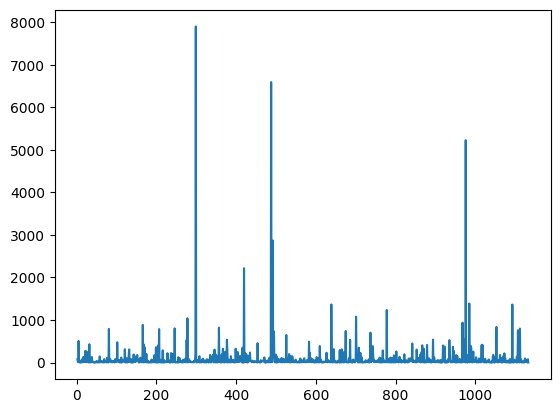

In [79]:

import matplotlib.pyplot as plt
o = []
for jacare in y:
    cara =cara +1
    o.append(cara) 
plt.plot(o,lista)
plt.show

In [296]:
count = 0
duvak = lista
hentai = []
for repeated in lista:
    contagem = duvak.count(repeated)
    hentai.append(contagem)

| CRIAR TXT DE CADA USUARIO POR QUANTIDADE DE TIMESTEMP |

In [149]:
pf = pd.read_csv('quantidade de arquivos.txt', sep =" ")
pf
for zero in lista:
    new = pf.loc[pf['quantidade_timestemp'] == zero]
    val = len(new)
    tam =str(val)
    nominho = str(zero)

    with open(r''+tam+ 'users '+ nominho +'timers.txt', 'w') as fp:
        fp.write(str(new))

| Escolha do menor numero de Timestemp |

In [179]:
exemplo = pf.loc[pf['quantidade_timestemp'] == 1]
exemplo['usuarios'].values

array(['0dhpckv', '0f4uezb', '0yx7i56', '1dip0jt', '1tnew6a', '2vv6lsy',
       '3f2txh', '4arhrqa', '4rk17kc', '5i52scp', '654f8mn', '6671xdz',
       '6qrtzb2', '6v3c51r', '7u5klrb', '8bi324', '9jiir43', 'b4dnqru',
       'd4ydsnq', 'd52s5qy', 'dici8pg', 'e651oif', 'f0lxlyl', 'f4tp67x',
       'feglfhj', 'g5dfles', 'hvvzcv5', 'j3as74z', 'jlx3rg4', 'kqmsnvb',
       'kwlh67i', 'l0qgb1b', 'lfqxp4u', 'lqxz7nk', 'm4k0ppn', 'mfg63ja',
       'nvxrplm', 'ooq9btt', 'pgfm0e5', 'plfzjjx', 'r05vewv', 'r883oye',
       'r92spr6', 'srekxpz', 't0p185n', 'x5z8t9c', 'xamvmms', 'yenehau',
       'ylocu2a', 'yv6n8gx', 'zcmg3s9', 'zyt437w'], dtype=object)

| preguiça de pensar um codigo para estrair do dataframe |

In [127]:
onestemp1 =['0dhpckv', '0f4uezb','0yx7i56','1dip0jt','1tnew6a','2vv6lsy','3f2txh','4arhrqa','4rk17kc','5i52scp','654f8mn','6671xdz','6qrtzb2','6v3c51r','7u5klrb','8bi324','9jiir43','b4dnqru','d4ydsnq','d52s5qy','dici8pg','e651oif','f0lxlyl','f4tp67x','feglfhj','g5dfles','hvvzcv5','j3as74z','jlx3rg4','kqmsnvb','kwlh67i','l0qgb1b','lfqxp4u','lqxz7nk','m4k0ppn','mfg63ja','nvxrplm','ooq9btt','pgfm0e5','plfzjjx','r05vewv','r883oye','r92spr6','srekxpz','t0p185n','x5z8t9c','xamvmms','yenehau','ylocu2a','yv6n8gx','zcmg3s9','zyt437w']
len(onestemp1)


52

| Leitura de json e retirada do tamanho das samples |

In [129]:
tentando = []
all_files = glob.glob('sensors/*_*.json')
for file in all_files:
    name = file.split('_')[1]
    jon = name.split('.')[0]
    tentando.append(jon)

In [238]:
len(tentando)
f = open('sensors/0yx7i56_1549297833161.json')
data = json.load(f)
df = pd.DataFrame(data['gyroscope'])

In [130]:
q_samplegy =[]
q_sampleacc =[]
q = 0
h = 0
b=0

for i in onestemp1:
    for j in tentando:
        json_files = glob.glob('sensors/'+i+'_'+j+'.json')
        for file in json_files:
            x = 'sensors/'+i+'_'+j+'.json'
            if  x == file:
                b = b+1
                h = b/52
                print(h,"%")
                f = open('sensors/'+i+'_'+j+'.json')
                data = json.load(f)
                df = pd.DataFrame(data['gyroscope'])
                q = len(df)
                q_samplegy.append(q)
                df = pd.DataFrame(data['accelerometer'])
                q = len(df)
                q_sampleacc.append(q)

0.019230769230769232 %
0.038461538461538464 %
0.057692307692307696 %
0.07692307692307693 %
0.09615384615384616 %
0.11538461538461539 %
0.1346153846153846 %
0.15384615384615385 %
0.17307692307692307 %
0.19230769230769232 %
0.21153846153846154 %
0.23076923076923078 %
0.25 %
0.2692307692307692 %
0.28846153846153844 %
0.3076923076923077 %
0.3269230769230769 %
0.34615384615384615 %
0.36538461538461536 %
0.38461538461538464 %
0.40384615384615385 %
0.4230769230769231 %
0.4423076923076923 %
0.46153846153846156 %
0.4807692307692308 %
0.5 %
0.5192307692307693 %
0.5384615384615384 %
0.5576923076923077 %
0.5769230769230769 %
0.5961538461538461 %
0.6153846153846154 %
0.6346153846153846 %
0.6538461538461539 %
0.6730769230769231 %
0.6923076923076923 %
0.7115384615384616 %
0.7307692307692307 %
0.75 %
0.7692307692307693 %
0.7884615384615384 %
0.8076923076923077 %
0.8269230769230769 %
0.8461538461538461 %
0.8653846153846154 %
0.8846153846153846 %
0.9038461538461539 %
0.9230769230769231 %
0.9423076923076

In [174]:
len(q_samplegy)

52

In [249]:
newlist = list(zip_longest(onestemp1, q_samplegy, fillvalue=''))
newlist = list(zip_longest(newlist, q_sampleacc, fillvalue=''))
with open(r'sample gyroscope and acc.txt', 'w') as fp:
    for item in newlist:
        fp.write("%s %i\n" % item)
print('Done')

Done


|Criar dataframe com valores da tiragem com accelerometro e gyroscopio|

São retirados os usuarios: 0yx7i56, 1dip0jt, 4arhrqa, 4rk17kc, 5i52scp, 8bi324, e651oif, f0lxlyl, jlx3rg4, ooq9btt, r883oye, r92spr6, zcmg3s9; 

Sobram 38 usuarios

Criação do dataframe 'zeta' com a filtragem 

In [393]:
data = pd.read_csv('sample gyroscope and acc.txt', sep =" ")
zeta = data.loc[data['sample_gy'] >= 1]
count = 0
beta = q_samplegy
alfa = []
for repeated in q_samplegy:
    contagem = beta.count(repeated)
    alfa.append(contagem)
len(zeta)

38

<AxesSubplot: >

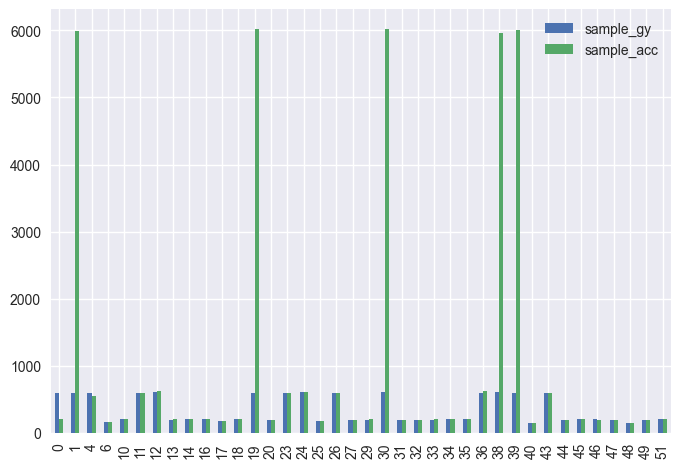

In [139]:
zeta.plot.bar()

| Criar txt por quantidade de Samples |


In [309]:

for zero in q_samplegy:
    new = zeta.loc[zeta['sample_gy'] == zero]
    val = len(new)
    tam =str(val)
    nominho = str(zero)

    with open(r''+tam+ 'users '+ nominho +'samples.txt', 'w') as fp:
        fp.write(str(new))

| criar analize do menor numero de samples |

User ylocu2a com 141 samples o que dão por volta de 2,8 segundos;

Sera utilizado como media para o grupo inteiro usar 141 samples.

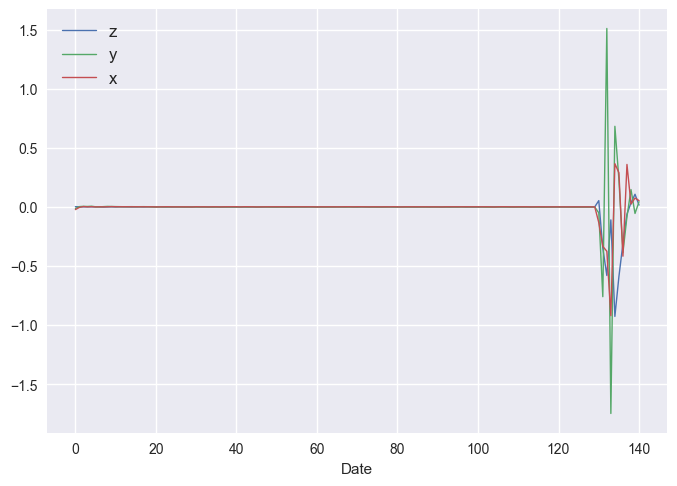

In [334]:
f = open('sensors/ylocu2a_1542982220706.json')
ylocu2a = json.load(f)
database = pd.DataFrame(ylocu2a['gyroscope'])
database.drop(["screen"], axis=1, inplace=True)
x = database[["x"]]
y = database[["y"]]
z = database[["z"]]
ax = database.plot(linewidth=1, fontsize=10)
# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12)

In [180]:
ylocu2af

,z,y,x
0,0.002350,-0.013046,-0.022278
1,0.000763,0.002930,-0.003632
2,0.000763,0.005051,0.003296
3,0.000763,0.003998,0.000626
4,0.000229,0.006119,0.002228
...,...,...,...
136,-0.309311,-0.386887,-0.416534
137,-0.060577,-0.081680,0.359512
138,0.034775,0.146820,0.023956
139,0.107208,-0.055054,0.075089


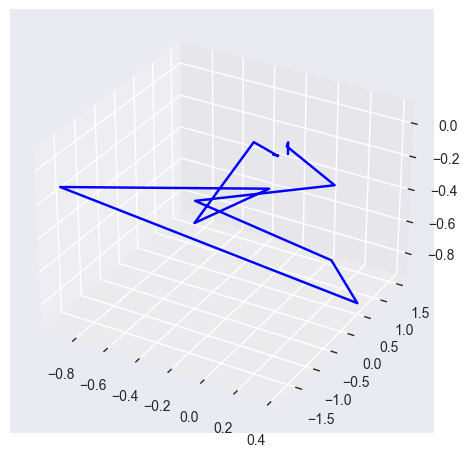

In [337]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

ax.plot3D(x, y, z, 'blue')
# Data for three-dimensional scattered points

0.02631578947368421 %
0.05263157894736842 %
0.07894736842105263 %
0.10526315789473684 %
0.13157894736842105 %
0.15789473684210525 %
0.18421052631578946 %
0.21052631578947367 %
0.23684210526315788 %
0.2631578947368421 %
0.2894736842105263 %
0.3157894736842105 %
0.34210526315789475 %
0.3684210526315789 %
0.39473684210526316 %
0.42105263157894735 %
0.4473684210526316 %
0.47368421052631576 %
0.5 %
0.5263157894736842 %
0.5526315789473685 %


C:\Users\rafav\AppData\Local\Temp\ipykernel_7400\2744996541.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


0.5789473684210527 %
0.6052631578947368 %
0.631578947368421 %
0.6578947368421053 %
0.6842105263157895 %
0.7105263157894737 %
0.7368421052631579 %
0.7631578947368421 %
0.7894736842105263 %
0.8157894736842105 %
0.8421052631578947 %
0.868421052631579 %
0.8947368421052632 %
0.9210526315789473 %
0.9473684210526315 %
0.9736842105263158 %
1.0 %


,x,y,z,user
0,0.133952,0.111970,-0.049376,0dhpckv
1,0.197435,0.166524,-0.036187,0dhpckv
2,0.057904,0.012222,-0.014930,0dhpckv
3,0.106366,0.121005,-0.010272,0dhpckv
4,0.096923,0.030849,-0.046198,0dhpckv
...,...,...,...,...
136,-0.011078,0.060776,-0.031326,zyt437w
137,0.030472,-0.022324,0.022995,zyt437w
138,0.068817,-0.069183,-0.011093,zyt437w
139,0.015564,0.045853,0.042175,zyt437w


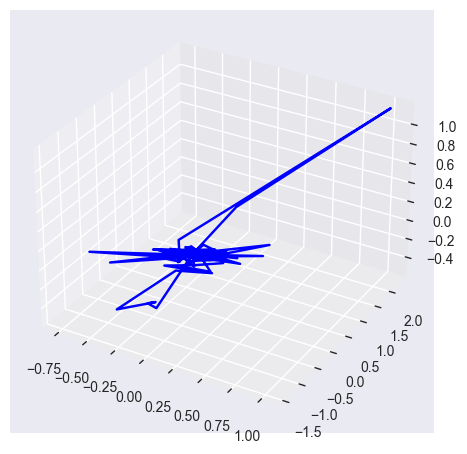

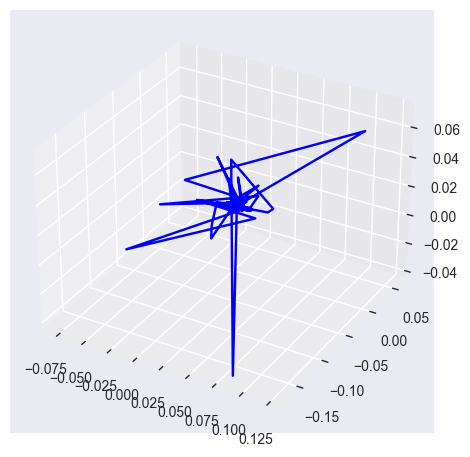

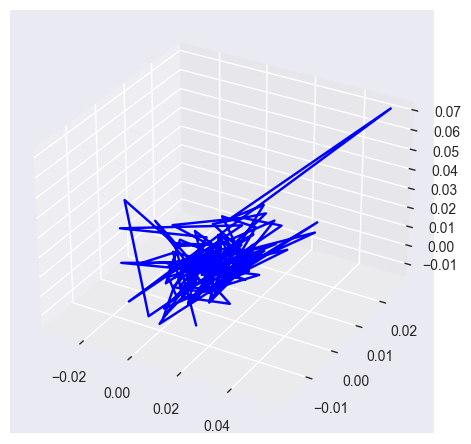

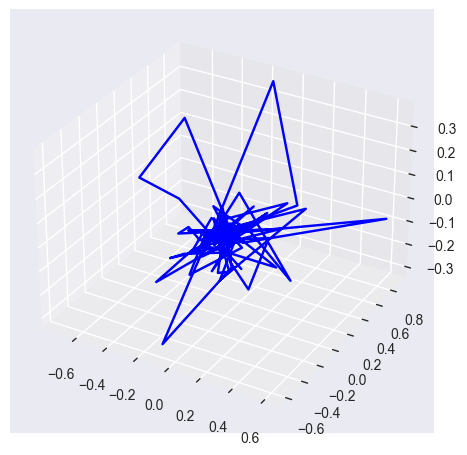

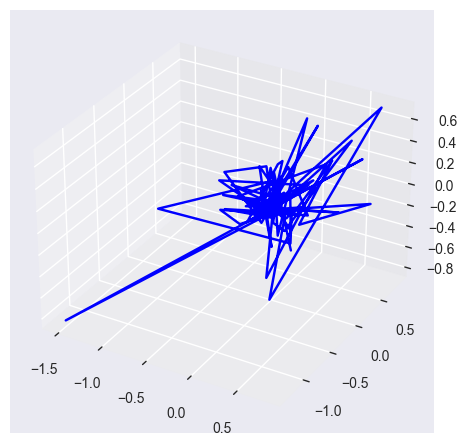

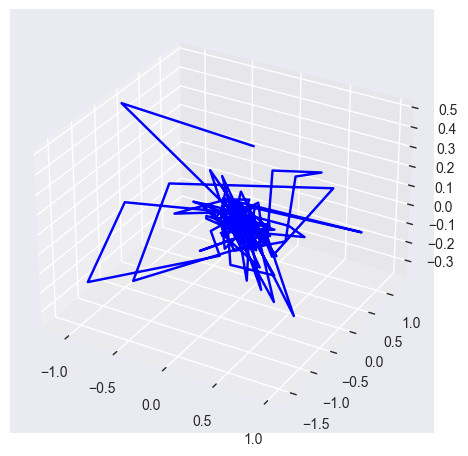

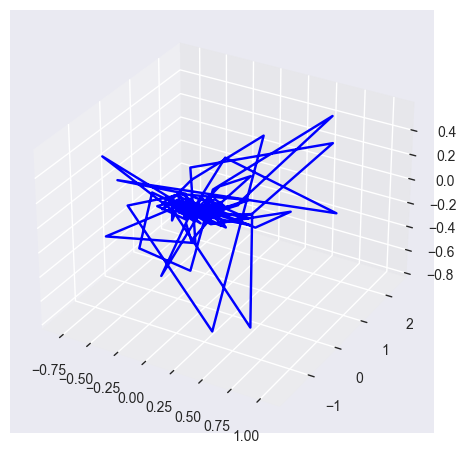

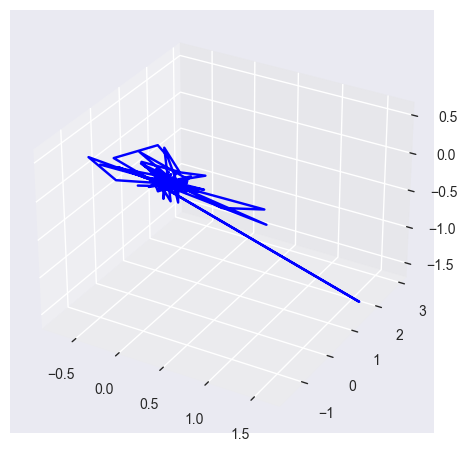

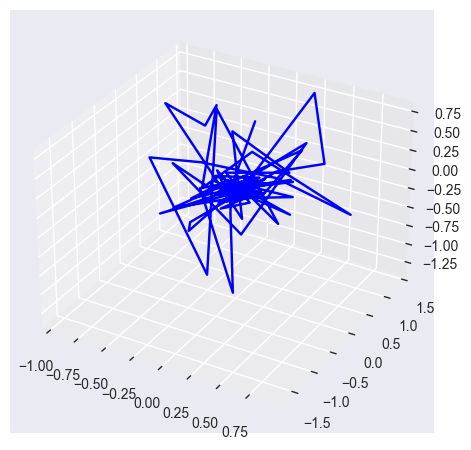

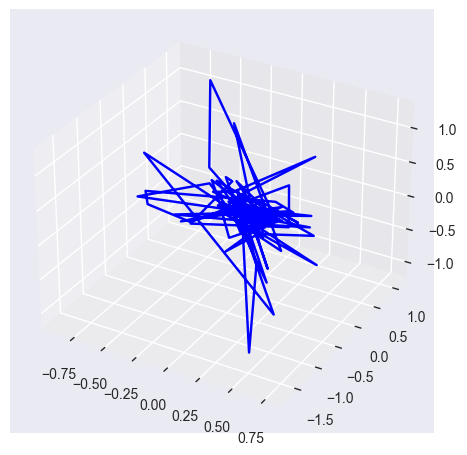

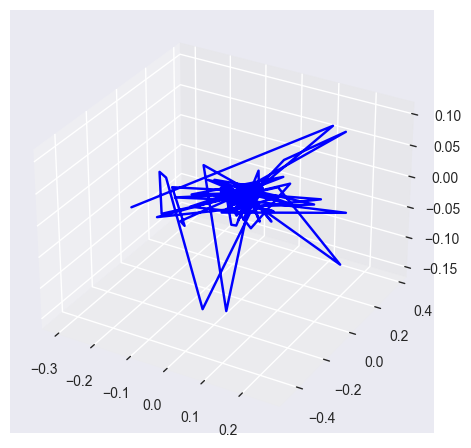

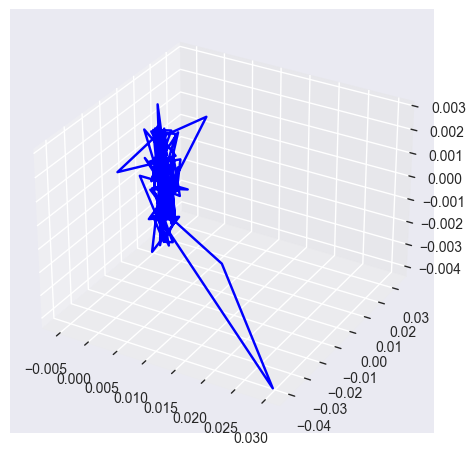

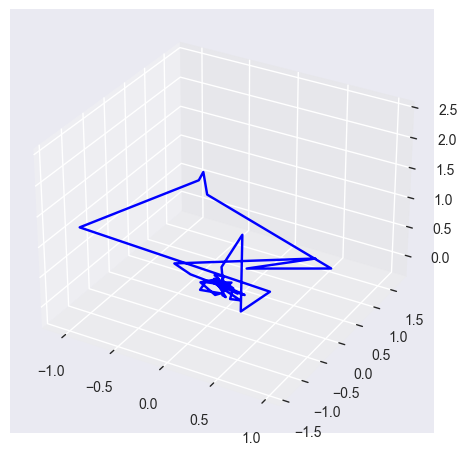

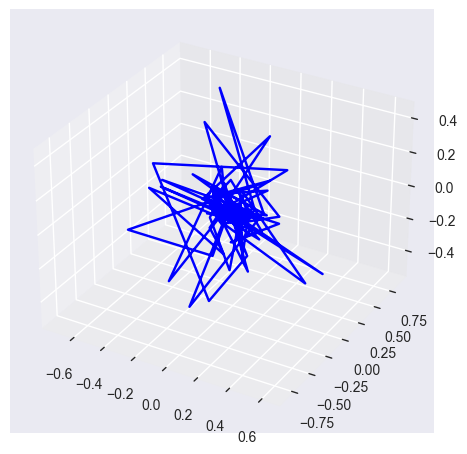

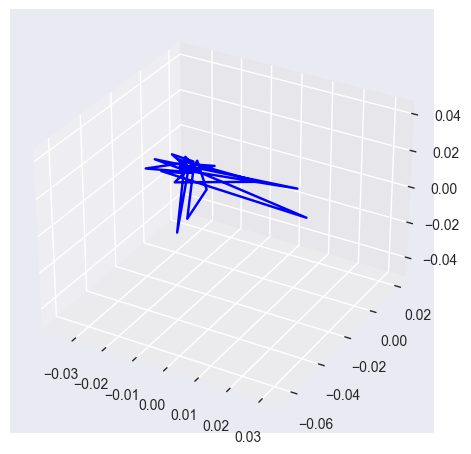

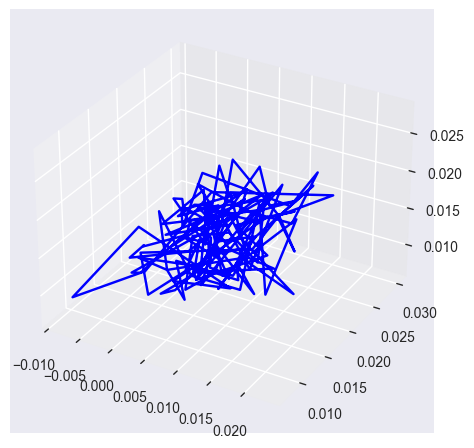

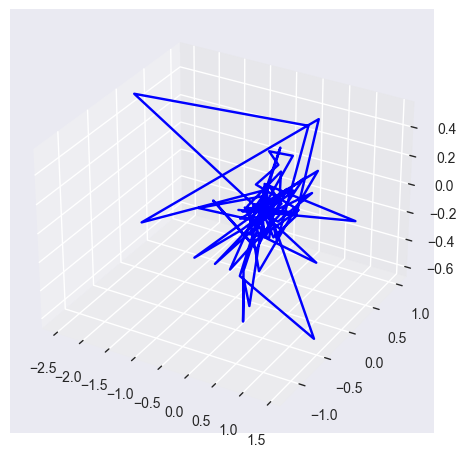

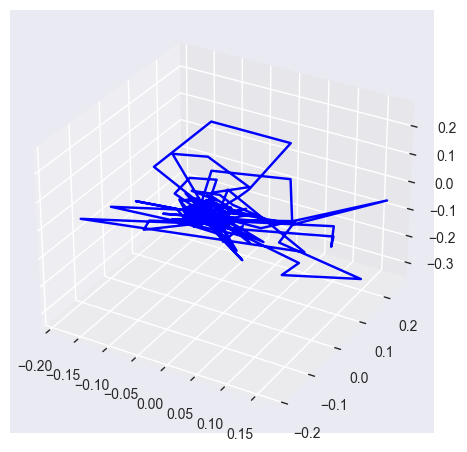

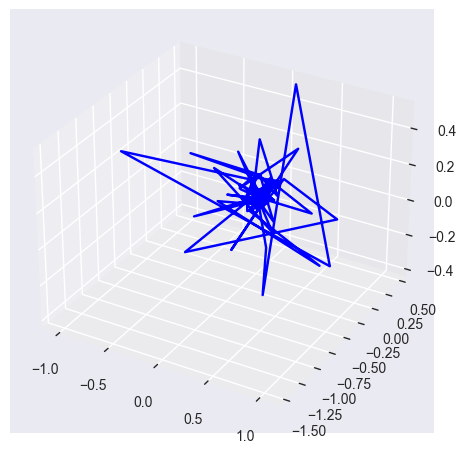

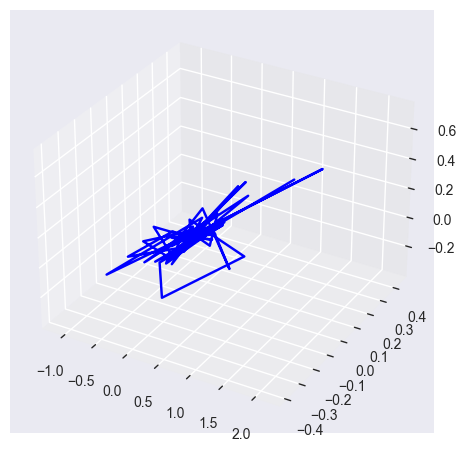

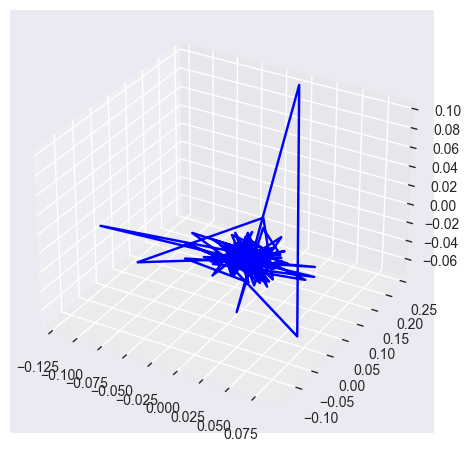

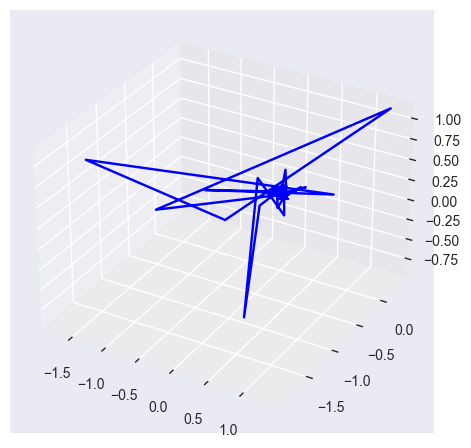

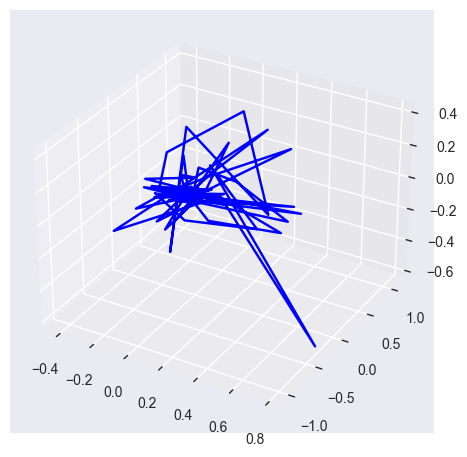

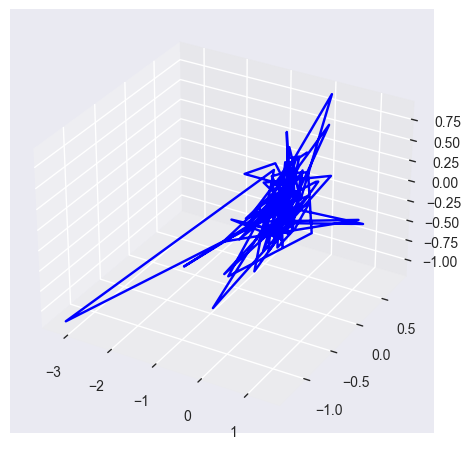

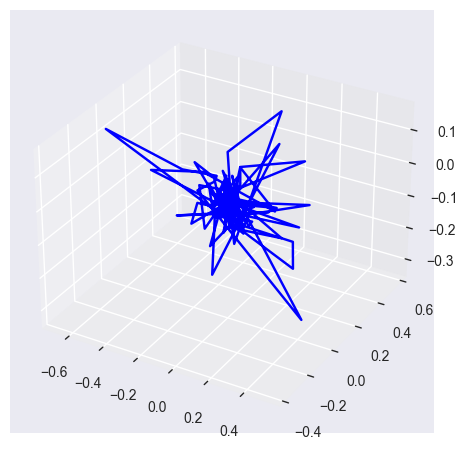

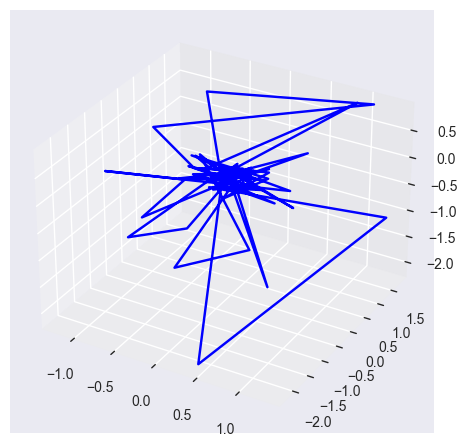

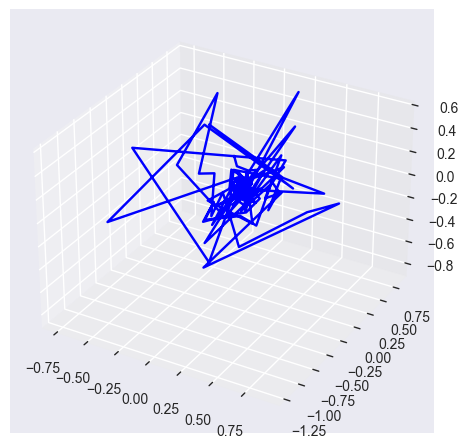

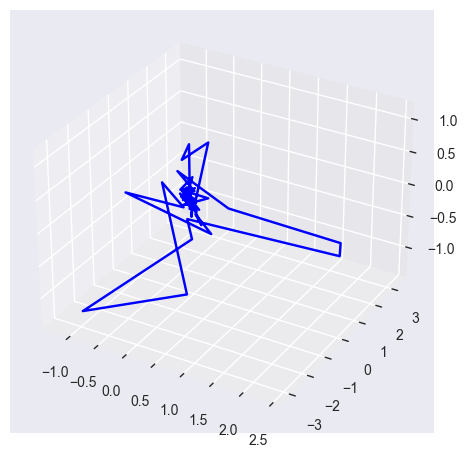

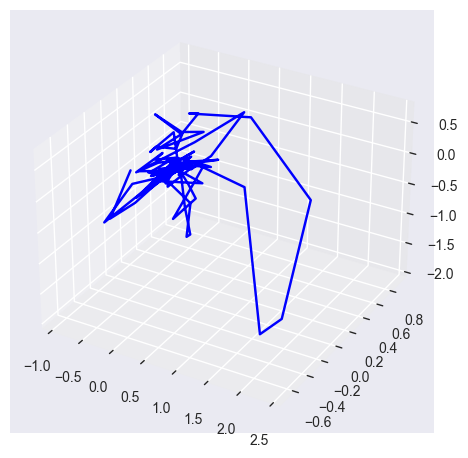

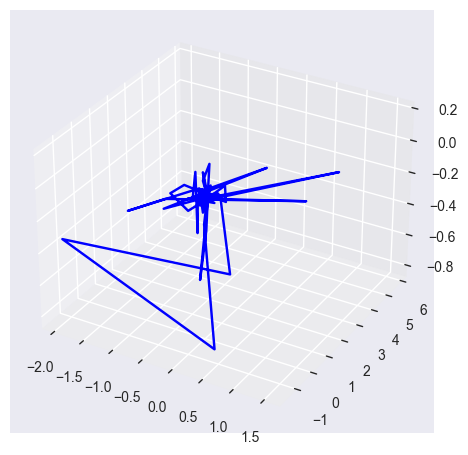

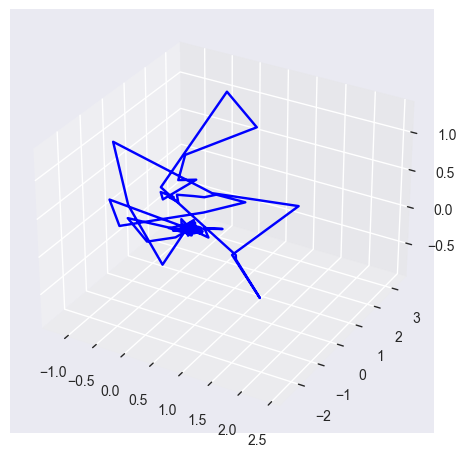

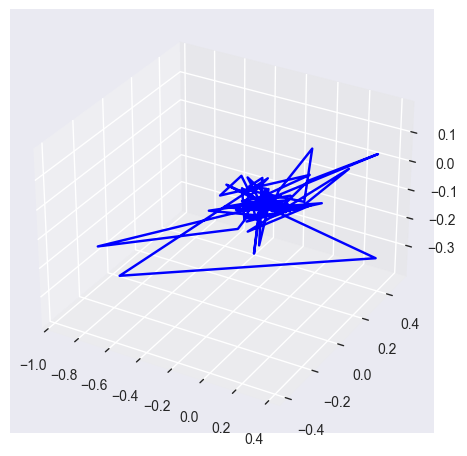

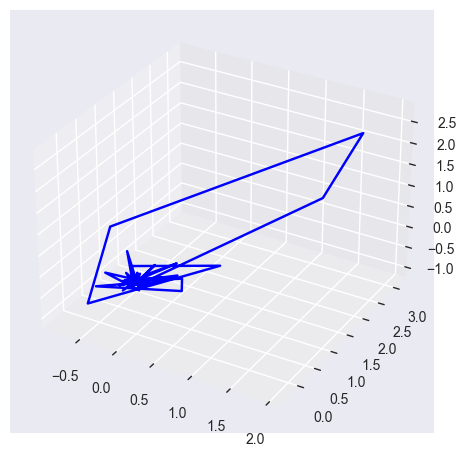

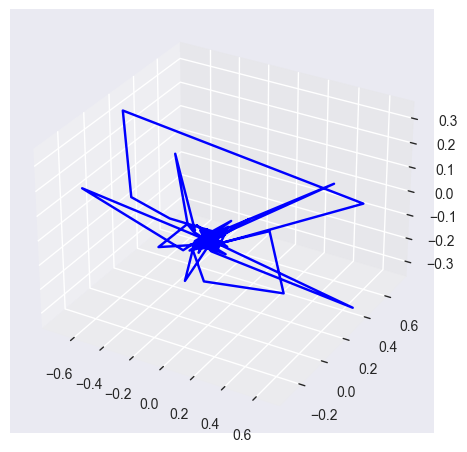

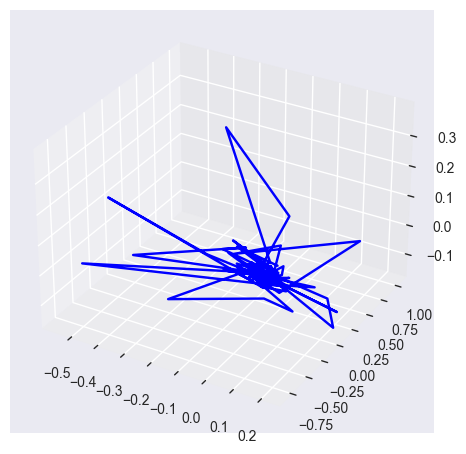

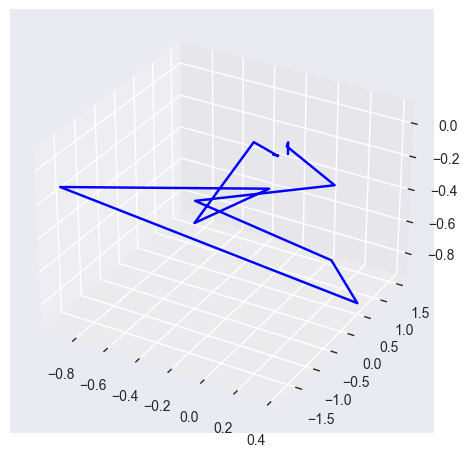

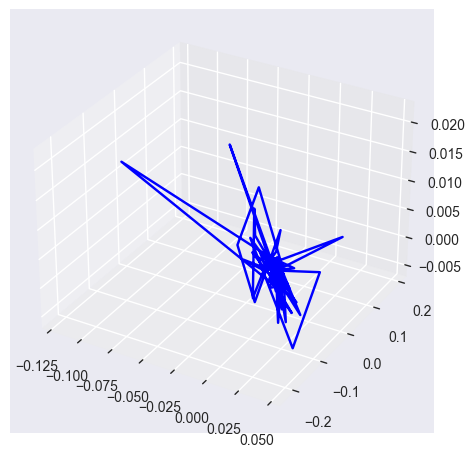

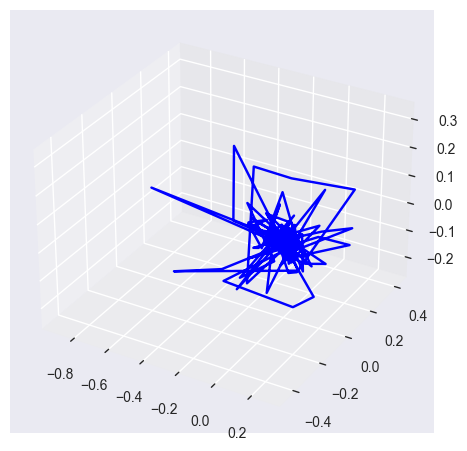

In [389]:

h = 0
b=0
chuck = []
q = zeta['usuario'].values
tamanho = 141
for i in q:
    for j in tentando:
        json_files = glob.glob('sensors/'+i+'_'+j+'.json')
        for file in json_files:
            x = 'sensors/'+i+'_'+j+'.json'
            if  x == file:
                b = b+1
                h = b/len(q)
                print(h,"%")
                f = open('sensors/'+i+'_'+j+'.json')
                data = json.load(f)
                df = pd.DataFrame(data['gyroscope'])
                df = df.assign(user = ' '+i)
                df = df.iloc[:141]
                if i == q[0]:
                    database_re = df
                re = df.drop(['user','screen'], axis=1)
                fig = plt.figure()
                ax = plt.axes(projection='3d')
                xx = df[["x"]]
                yy = df[["y"]]
                zz = df[["z"]]

                # Data for a three-dimensional line

                ax.plot3D(xx, yy, zz, 'blue')
                plt.savefig(''+i+'.png')
                frames = [database_re, df]
                database_re = pd.concat(frames)
                
database_re = database_re.drop(['screen'], axis = 1)
database_re